영상화질 4K처럼 sound에서도 컴퓨터가 처리하는 데이터의 양(품질과 관련됨)의 차이가 있다. 그걸 결정해주는게 SR(sampling rate)
옛날 전화기로는 누구목소린지 헷갈리는 경우가 있었는데 요즘 점점 그게 덜해짐. 소리의 해상도 차이 덕분!

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz / 1초를 만개로 쪼갬(음질, 점박이갯수)
dur = 0.5        # in seconds, 0.5초
freq = 100.0     # sine frequency, Hz, 즉 1초에 백번의 sign wave(태극문양)이 반복된다.

소리는 sign wave의 형태인데, sign wave는 어떤 형태일까! 
소리는 아무리 복잡해도 사인웨이브의 합. 
소리는 두가지에 의해 결정되는데 음의 높낮이(freq, 빠르기) 음의 강도(amplitude, 진폭)과 관련되어있다. 두개는 독립적임!

In [3]:
# generate time ** 제일 먼저해야함! Why? x축이거든!
t = np.arange(1, sr * dur+1)/sr # 시간을 만분의 1초에서 만분의 5천초로 나눈 것!! 즉 0.5초까지의 시간을 변수로 설정한ㄸ 것
# 몇개로 쪼개느냐에 따라서 (sr)에 따라서 소리 해상도가 달라짐!
# arrage는 sign 함수 인가봄, 이 arrange()안에 들어가는 input은 숫자인데 *각도값(중요)*을 넣어야 의미있게 작동한다.
#arrange(1,sr+1)/sr 은 만분의 1초부터 1초까지 만개로 쪼갠 값을 생성
#arrange(1, sr*0.5 + 1)는 1부터 5000까지 만드는 기능. 만약 +1이 없으면 4999개 만드는 것. 여기다 /sr 붙이면 만분에 일부터 만분의 오천까지
#시험문제 EX) leg(t)=? 에서 ?에 들어갈 값은?

In [4]:
# 그런데 그런 각도값을 '45도' 형태로는 못넣음! 즉, pi/4로 표현! pi가 180도 이니까 
# generate phase  
theta = t * 2*np.pi * freq #한 프리퀀시는 2파이, 

In [5]:
# generate signal by cosine-phasor
s = np.sin(theta*1)
#문제 예시 ) theta와 s의 length가 가타!!!

Text(0, 0.5, 'real')

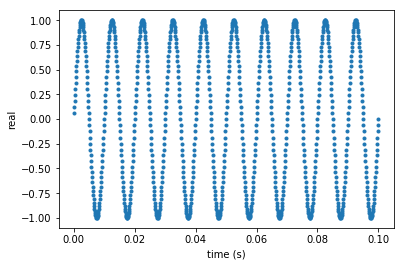

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') #정말 간단하게는 ax.plot(t,s)로 나타낼 수 있다. #점의 개수는 len(x), 이경우 천개의 점을 ㅣㅈㄱ는다.
ax.set_xlabel('time (s)') #x축 제목
ax.set_ylabel('real')# y축 제목

복소평면! a+bi 꼴 지지난학기 설명 참조! 각도만들어주는 개념! a는 x축, b는 y축으로 반지름 1인 원 삥삥 도는거
어떤쪽(실수값)에서 보는게 cos이고 반대쪽(허수값)에서 보면 sin임!! 축의 차이